In [1]:
from sklearn import datasets
d = datasets.fetch_mldata('MNIST original', data_home='.')

In [2]:
X = d['data']
y = d['target']
print(type(X), type(y)) # check data type of variable X, y
print(X.shape, y.shape) # returns (70000, 784) (70000,)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(70000, 784) (70000,)


In [3]:
print(X[0])
print(y[0:50])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

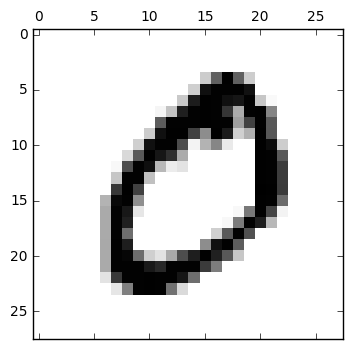

In [4]:
from matplotlib import pyplot as plt
x0 = X[0].reshape(28,28)
plt.rc('image', cmap='binary')
plt.matshow(x0)
plt.savefig('x0.png')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

56000 14000
56000 14000


In [6]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train[:1000], y_train[:1000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = model_1.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.82430681133928041, 0.82402456862765816, 0.82396775557233148, None)

In [9]:
from sklearn import metrics
target_names=['0','1','2','3','4','5','6','7','8','9']
print (metrics.classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.92      0.92      0.92      1339
          1       0.89      0.94      0.91      1547
          2       0.86      0.83      0.85      1463
          3       0.80      0.79      0.80      1413
          4       0.82      0.81      0.81      1340
          5       0.74      0.73      0.74      1313
          6       0.89      0.89      0.89      1421
          7       0.88      0.86      0.87      1450
          8       0.69      0.67      0.68      1341
          9       0.75      0.80      0.77      1373

avg / total       0.83      0.83      0.83     14000



In [11]:
y_values = model_1.predict_proba(X_test)
print (('정답: {}').format(y_test[0]))
print (('예측: {}').format(y_pred[0]))
print (('확률값: {}').format(y_values[0]))

정답: 9.0
예측: 9.0
확률값: [  1.29825004e-16   7.53918643e-31   1.93230831e-19   6.72149438e-13
   1.93576930e-13   3.78795986e-15   4.28211606e-15   1.56739986e-14
   6.24460775e-12   1.00000000e+00]


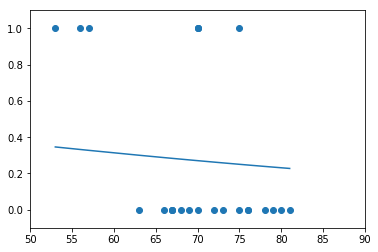

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import re

with open('C:/data.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = np.array(next(reader))
  
    X,y = [],[]
    for row in reader:
        X.append(row[0])
        y.append(row[1])
        
    X = np.array(X)
    y = np.array(y)

X_1=[]


for i in range(len(X)):
     X_1.append([int(X[i])])
        
model = LogisticRegression()
model.fit(X_1[:], y)
y_values = model.predict_proba(X_1)

plt.axis([50,90,-0.1,1.1])
plt.plot(X_1,y_values[:,1])
plt.scatter(X_1, y)
plt.show()